Import the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate the dataset

In [32]:
np.random.seed(1)
A0 = (np.random.random(size=(2, 2)) @ np.random.normal(size=(2, 200))).T
print(A0.shape)


(200, 2)


In [48]:
print(A0[:5,:])

[[-0.62530162 -0.17006366]
 [ 0.96069503  0.5909006 ]
 [-0.59854339 -0.40259339]
 [-2.22805938 -0.53257674]
 [-0.46143006 -0.49886724]]


Visualize the dataset

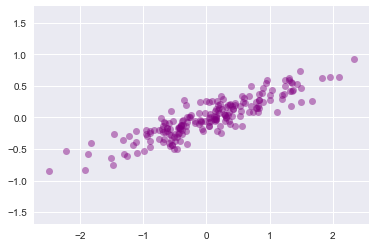

In [33]:
plt.plot(A0[:, 0], A0[:, 1], 'o', color = 'purple', alpha = 0.45)
plt.axis('equal');

Subtract the mean

In [35]:
print(np.mean(A0, axis = 0))
mu = np.mean(A0,axis=0)
A = A0 - mu
print(np.mean(A,axis=0))

[ 0.03351168 -0.00408072]
[-4.4408921e-18  0.0000000e+00]


Compute sample covariance matrix Σ=AT x A/(m−1)

In [31]:
m,n = A.shape
Sigma = (A.T @ A)/(m-1)
print("---")
print("Sigma:")
print(Sigma)

---
Sigma:
[[0.68217761 0.23093475]
 [0.23093475 0.09883179]]


Perform eigen-decomposition of Σ using np.linalg.eig(Sigma)

In [40]:
eigen_values, eigen_vectors = np.linalg.eig(Sigma)
print("---")
print("Evalues:")
print(eigen_values)
print("---")
print("Evectors:")
print(eigen_vectors)

---
Evalues:
[0.7625315 0.0184779]
---
Evectors:
[[ 0.94446029 -0.32862557]
 [ 0.32862557  0.94446029]]


In [41]:
x_v1, y_v1 = eigen_vectors[:,0].ravel()
x_v2, y_v2 = eigen_vectors[:,1].ravel()

m1 = y_v1/x_v1 # Gradient of 1st eigenvector
m2 = y_v2/x_v2 # Gradient of 2nd eigenvector

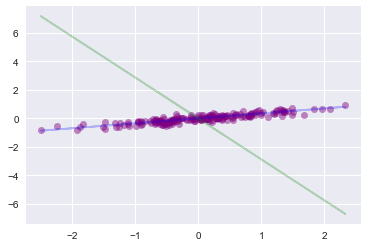

In [42]:
e1 = A0[:, 0] * m1
e2 = A0[:, 0] * m2
plt.plot(A0[:, 0], A0[:, 1], 'o', color = 'purple', alpha = 0.45)
plt.plot(A0[:, 0], e1, color = 'blue', alpha = 0.25)
plt.plot(A0[:, 0], e2, color = 'green', alpha = 0.25)
#plt.axis('equal');

Compress by ordering k eigenvectors according to largest eigenvalues and compute Axk

In [55]:
print("---")
print("Compressed - 2D to 1D:")
Acomp = A @ eigen_vectors[:,:1] # first evector
print(Acomp.shape)
print(Acomp[:5,:]) # first 5 observations


---
Compressed - 2D to 1D:
[[0.94446029]
 [0.32862557]]
(200, 1)
[[-0.67676923]
 [ 1.07121393]
 [-0.72791236]
 [-2.30964136]
 [-0.63005232]]


Reconstruct from the compressed version. We can reconstruct the data back by using inverse transformation mathematically represented by Axk x k.T

In [57]:
Arec = A @ X[:,:1] @ X[:,:1].T # first evector
Arec = Arec + mu
print(Arec[:5,:]) # first 5 obs, adding mu to compare to original

[[-0.60566999 -0.22648439]
 [ 1.0452307   0.34794757]
 [-0.65397264 -0.24329133]
 [-2.14785286 -0.76308793]
 [-0.56154772 -0.21113202]]


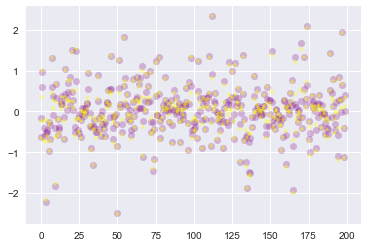

In [54]:
plt.plot(A0, 'o', color = 'purple', alpha = 0.25)
plt.plot(Arec, '*', color = 'yellow', alpha = 0.45)
plt.show()